### Import libraries and dataset

In [1]:
import pandas as pd
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
import requests

In [2]:
paragraf = requests.get('https://github.com/rasyidev/well-known-datasets/raw/main/rendang.txt').text
paragraf

'Rendang dinobatkan menjadi salah satu makanan terenak di dunia. Makanan khas Sumatera Barat ini memang digemari banyak orang, baik di Indonesia maupun mancanegara. Rendang semula merupakan menu utama di rumah makan yang berasal dari Sumatera Barat yang dikenal dengan masakan Padang. Rendang khas Minang adalah yang paling enak dan mendunia. Masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.\r\n\r\nDalam tradisi Minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya. Ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu. Bagi masyarakat Minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan. Hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas Indonesia di mata dunia.\r\n\r\nDalam proses pembuatannya, diolah 

### Tokenize each paragraph

In [3]:
sentences = nltk.sent_tokenize(paragraf)
sentences

['Rendang dinobatkan menjadi salah satu makanan terenak di dunia.',
 'Makanan khas Sumatera Barat ini memang digemari banyak orang, baik di Indonesia maupun mancanegara.',
 'Rendang semula merupakan menu utama di rumah makan yang berasal dari Sumatera Barat yang dikenal dengan masakan Padang.',
 'Rendang khas Minang adalah yang paling enak dan mendunia.',
 'Masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering.',
 'Dalam tradisi Minangkabau, rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat, pernikahan dan acara penting lainnya.',
 'Ketika istana negara sedang menerima kunjungan dari negara lain, rendang pun sering disajikan untuk para tamu.',
 'Bagi masyarakat Minang, rendang memiliki filosofi yang berarti kesabaran, kebijakan dan ketekunan.',
 'Hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas Indonesia di mata dunia.',
 'Dalam prose

In [4]:
words_table = []

for i in range(len(sentences)):
    words = re.sub('[^a-zA-Z]', ' ', sentences[i])
    words = words.lower()
    words = words.split()
    words = ' '.join(words)
    words_table.append(words)

In [5]:
words_table

['rendang dinobatkan menjadi salah satu makanan terenak di dunia',
 'makanan khas sumatera barat ini memang digemari banyak orang baik di indonesia maupun mancanegara',
 'rendang semula merupakan menu utama di rumah makan yang berasal dari sumatera barat yang dikenal dengan masakan padang',
 'rendang khas minang adalah yang paling enak dan mendunia',
 'masakan ini memiliki tampilan yang menyisakan potongan daging berwarna coklat kehitaman dan kering',
 'dalam tradisi minangkabau rendang dianggap sebagai makanan kehormatan dalam acara adat seperti perayaan adat pernikahan dan acara penting lainnya',
 'ketika istana negara sedang menerima kunjungan dari negara lain rendang pun sering disajikan untuk para tamu',
 'bagi masyarakat minang rendang memiliki filosofi yang berarti kesabaran kebijakan dan ketekunan',
 'hal inilah yang menjadi kebanggaan masyarakat minang di manapun mereka berpijak serta menjadi identitas sebagai makanan khas indonesia di mata dunia',
 'dalam proses pembuatannya 

### CountVectorizer

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(words_table).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Cosine Similarity

In [7]:
from scipy import spatial

In [8]:
List1 = X[0]
List2 = X[1]
List3 = X[2]

result = 1 - spatial.distance.cosine(List1, List2, List3)
print(result)

0.408248290463863


### Bag of Words

In [9]:
index = ['Kalimat 1',
         'Kalimat 2',
         'Kalimat 3',
         'Kalimat 4',
         'Kalimat 5',
         'Kalimat 6',
         'Kalimat 7',
         'Kalimat 8',
         'Kalimat 9',
         'Kalimat 10',
         'Kalimat 11',
         'Kalimat 12',
         'Kalimat 13',
         'Kalimat 14',
         'Kalimat 15',
         'Kalimat 16',
         'Kalimat 17',
         'Kalimat 18',
         'Kalimat 19',
         'Kalimat 20']

In [10]:
words = cv.get_feature_names()
BoW = pd.DataFrame(X, columns=words, index=index)
pd.set_option("display.max_columns", None)
BoW

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acara,adalah,adanya,adat,alasan,bagi,bahan,bahwa,baik,banyak,barat,bawang,beberapa,berarti,berasal,berpijak,bersaing,bertahan,bertekstur,berwarna,bila,bumbu,cabai,cairan,cita,coklat,daging,dalam,dan,dapat,dari,daun,dengan,di,diakui,dianggap,digemari,digunakan,dikenal,dimasak,dinikmati,dinobatkan,diolah,diperlukan,disajikan,diyakini,dunia,empuk,enak,favorit,filosofi,gurih,hal,halal,hancur,hanya,hingga,identitas,indonesia,ini,inilah,internasional,istana,jahe,jam,jeruk,juga,kancah,kaya,ke,kebanggaan,kebijakan,kehitaman,kehormatan,kering,kesabaran,ketekunan,ketika,khas,kuliner,kunjungan,kunyit,lain,lainnya,lama,langsung,lengkuas,lidah,makan,makanan,mampu,manapun,mancanegara,manis,masakan,masyarakat,mata,maupun,memang,memasaknya,membuat,membuktikan,membutuhkan,memiliki,mendunia,menembus,menerima,menggoyang,menghasilkan,mengherankan,menjadi,menu,menyisakan,merah,mereka,merupakan,meski,minang,minangkabau,mudah,namun,negara,nusantara,orang,pada,padang,paling,para,pasar,pedas,pembuatannya,penting,perayaan,pernikahan,perpaduan,potongan,proses,pun,putih,rasa,rasanya,rempah,rendang,resep,rumah,salah,sangat,santan,sapi,satu,sebagai,secara,sedang,sehingga,selain,selama,semula,seperti,sering,serta,siapa,simple,sumatera,tak,tampilan,tamu,telah,terenak,terlebih,tersebutlah,tidak,tradisi,untuk,utama,waktu,yang
Kalimat 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Kalimat 2,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Kalimat 3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2
Kalimat 4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Kalimat 5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Kalimat 6,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Kalimat 7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
Kalimat 8,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Visualization with WordCloud

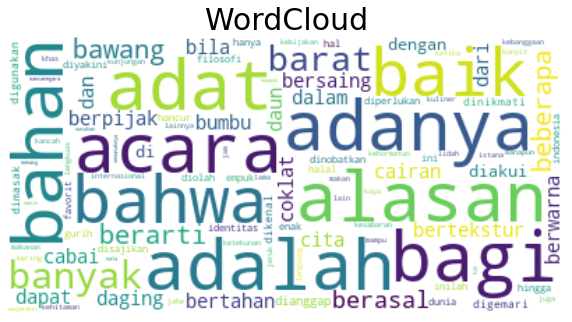

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = str(words).replace("'","")

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white",
                      prefer_horizontal=0.80).generate(text)
plt.figure(figsize=(10,50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud", fontsize=30)
plt.axis("off")
plt.show()

### Count the word occurrences

In [12]:
BoW_table = pd.DataFrame(BoW.sum())
pd.set_option("display.max_rows", None)
BoW_table

,0
acara,2
adalah,1
adanya,1
adat,2
alasan,1
bagi,1
bahan,1
bahwa,1
baik,1
banyak,2


In [13]:
BoW.sum().sum()

297